In [1]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400 kB 32.7 MB/s 
     |████████████████████████████████| 44 kB 2.5 MB/s 
     |████████████████████████████████| 793 kB 60.7 MB/s 
     |████████████████████████████████| 11.2 MB 58.2 MB/s 
     |████████████████████████████████| 1.4 MB 63.3 MB/s 
     |████████████████████████████████| 9.8 MB 23.2 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 179 kB 73.6 MB/s 
     |████████████████████████████████| 585 kB 61.2 MB/s 
     |████████████████████████████████| 381 kB 74.3 MB/s 
     |████████████████████████████████| 944 kB 62.6 MB/s 
     |████████████████████████████████| 596 kB 51.0 MB/s 
     |████████████████████████████████| 140 kB 75.5 MB/s 
     |████████████████████████████████| 419 kB 72.2 MB/s 
     |████████████████████████████████| 1.1 MB 64.5 MB/s 
     |████████████████████████████

In [2]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 32.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [2]:
from darts import TimeSeries

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [22]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.utils import SeasonalityMode

In [3]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    AutoARIMA,
    VARIMA,
    ExponentialSmoothing,
    Theta
)
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
import warnings
warnings.filterwarnings('ignore')



In [42]:
import sklearn

In [43]:
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('pax_ts.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'total_doses', 'holiday', 'dow_0', 'dow_1',
       'dow_2', 'dow_3', 'dow_4', 'dow_5',
       ...
       'pax_intl_bus__t-300', 'pax_intl_lei__t-300', 'pax_dom_bus__t-300',
       'pax_dom_lei__t-300', 'pax_B1_dom__t-300', 'pax_B2_dom__t-300',
       'pax_B3_dom__t-300', 'pax_B1_intl__t-300', 'pax_B2_intl__t-300',
       'pax_B3_intl__t-300'],
      dtype='object', length=347)

In [6]:
df.rename({'Unnamed: 0':'ts10'},axis=1,inplace=True)
df['ts10'] = pd.to_datetime(df['ts10'])
df.set_index('ts10',inplace=True)
df = df.iloc[:,:-300]
df = df.drop('date',axis=1)
df.head()

total_doses  holiday  dow_0  dow_1  dow_2  dow_3  dow_4  \
ts10                                                                           
2021-01-01 00:00:00      4438527        1      0      0      0      0      1   
2021-01-01 00:10:00      4438527        1      0      0      0      0      1   
2021-01-01 00:20:00      4438527        1      0      0      0      0      1   
2021-01-01 00:30:00      4438527        1      0      0      0      0      1   
2021-01-01 00:40:00      4438527        1      0      0      0      0      1   

                     dow_5  dow_6  tod_Afternoon  ...  pax_intl_bus  \
ts10                                              ...                 
2021-01-01 00:00:00      0      0              0  ...           0.0   
2021-01-01 00:10:00      0      0              0  ...           0.0   
2021-01-01 00:20:00      0      0              0  ...           0.0   
2021-01-01 00:30:00      0      0              0  ...           0.0   
2021-01-01 00:40:00      0      0              0  ...           0.0   

                     pax_intl_lei  pax_dom_bus  pax_dom_lei  pax_B1_dom  \
ts10                                                                      
2021-01-01 00:00:00           0.0          0.0          0.0         0.0   
2021-01-01 00:10:00           0.0          0.0          0.0         0.0   
2021-01-01 00:20:00           0.0          0.0          0.0         0.0   
2021-01-01 00:30:00           0.0          0.0          0.0         0.0   
2021-01-01 00:40:00           0.0          0.0          0.0         0.0   

                     pax_B2_dom  pax_B3_dom  pax_B1_intl  pax_B2_intl  \
ts10                                                                    
2021-01-01 00:00:00         0.0         0.0          0.0          0.0   
2021-01-01 00:10:00         0.0         0.0          0.0          0.0   
2021-01-01 00:20:00         0.0         0.0          0.0          0.0   
2021-01-01 00:30:00         0.0         0.0          0.0          0.0   
2021-01-01 00:40:00         0.0         0.0          0.0          0.0   

                     pax_B3_intl  
ts10                              
2021-01-01 00:00:00          0.0  
2021-01-01 00:10:00          0.0  
2021-01-01 00:20:00          0.0  
2021-01-01 00:30:00          0.0  
2021-01-01 00:40:00          0.0  

[5 rows x 45 columns]

In [ ]:
#Randomly choose 5% of the data as the test dataset

In [7]:
df.shape

(52560, 45)

In [8]:
sample = df.iloc[49035:51663,:]

In [9]:
sample.shape

(2628, 45)

In [ ]:
#Choose Targets

In [10]:
targets = sample.iloc[:,-6:]
covariates = sample[['total_doses','holiday','seats_tr','seats_lc','tod_Afternoon', 'tod_Evening', 'tod_Morning','tod_Overnight']]
#covariates = sample.iloc[:,:-10]

In [ ]:
targets.head()

pax_B1_dom  pax_B2_dom  pax_B3_dom  pax_B1_intl  \
ts10                                                                   
2021-12-07 12:30:00   99.824553         0.0    0.000000          0.0   
2021-12-07 12:40:00    0.000000         0.0    0.000000          0.0   
2021-12-07 12:50:00    0.000000         0.0    0.000000          0.0   
2021-12-07 13:00:00  202.048418         0.0  195.378026          0.0   
2021-12-07 13:10:00  232.310975         0.0    0.000000          0.0   

                     pax_B2_intl  pax_B3_intl  
ts10                                           
2021-12-07 12:30:00          0.0          0.0  
2021-12-07 12:40:00          0.0          0.0  
2021-12-07 12:50:00          0.0          0.0  
2021-12-07 13:00:00          0.0          0.0  
2021-12-07 13:10:00          0.0          0.0

In [ ]:
covariates.head()

total_doses  holiday  seats_tr  seats_lc  tod_Afternoon  \
ts10                                                                           
2021-12-07 12:30:00    494080967        0       0.0     182.0              0   
2021-12-07 12:40:00    494080967        0       0.0       0.0              0   
2021-12-07 12:50:00    494080967        0       0.0       0.0              0   
2021-12-07 13:00:00    494080967        0     320.0     186.0              1   
2021-12-07 13:10:00    494080967        0       0.0     368.0              1   

                     tod_Evening  tod_Morning  tod_Overnight  
ts10                                                          
2021-12-07 12:30:00            0            1              0  
2021-12-07 12:40:00            0            1              0  
2021-12-07 12:50:00            0            1              0  
2021-12-07 13:00:00            0            0              0  
2021-12-07 13:10:00            0            0              0

In [11]:
cov = TimeSeries.from_dataframe(covariates)
tar = TimeSeries.from_dataframe(targets)

In [12]:
sc_cov = Scaler()
cov_sc = sc_cov.fit_transform(cov)

sc_tar = Scaler()
tar_sc = sc_tar.fit_transform(tar)

In [13]:
cov_train, cov_test = cov_sc.split_before(pd.Timestamp(2021,12,23))
tar_train, tar_test = tar_sc.split_before(pd.Timestamp(2021,12,23))

In [28]:
#python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 28.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
darts 0.20.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


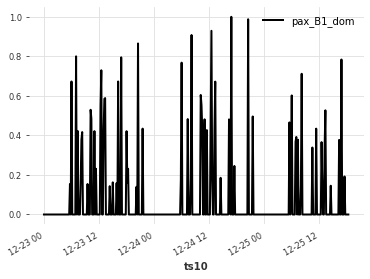

In [15]:
tar_test['pax_B1_dom'].plot()

In [ ]:
#Gabe's Model

#model_cov = BlockRNNModel(
#    model="LSTM",
#    input_chunk_length=12,
#    output_chunk_length=1,
#    n_epochs=5
#)

In [36]:
model_nbeats = NBEATSModel(
    input_chunk_length=12,
    output_chunk_length=5,
    n_epochs=5
)

In [37]:
train, val = tar_train.split_after(pd.Timestamp("20211208"))

In [38]:
model_nbeats.fit(train, val_series=val, verbose=True)

2022-07-19 16:10:10 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 54 samples.
2022-07-19 16:10:10 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-19 16:10:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-19 16:10:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-19 16:10:10 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-19 16:10:10 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-19 16:10:10 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
----

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [39]:
pred_series = model_nbeats.historical_forecasts(
    tar_train,
    start=pd.Timestamp("20211208"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)

  0%|          | 0/431 [00:00<?, ?it/s]

Predicting: 2it [00:00, ?it/s]

  0%|          | 1/431 [00:00<01:05,  6.56it/s]

Predicting: 2it [00:00, ?it/s]

  0%|          | 2/431 [00:00<01:11,  6.04it/s]

Predicting: 2it [00:00, ?it/s]

  1%|          | 3/431 [00:00<01:08,  6.27it/s]

Predicting: 2it [00:00, ?it/s]

  1%|          | 4/431 [00:00<01:10,  6.05it/s]

Predicting: 2it [00:00, ?it/s]

  1%|          | 5/431 [00:00<01:10,  6.03it/s]

Predicting: 2it [00:00, ?it/s]

  1%|▏         | 6/431 [00:00<01:08,  6.21it/s]

Predicting: 2it [00:00, ?it/s]

  2%|▏         | 7/431 [00:01<01:12,  5.87it/s]

Predicting: 2it [00:00, ?it/s]

  2%|▏         | 8/431 [00:01<01:12,  5.83it/s]

Predicting: 2it [00:00, ?it/s]

  2%|▏         | 9/431 [00:01<01:13,  5.78it/s]

Predicting: 2it [00:00, ?it/s]

  2%|▏         | 10/431 [00:01<01:14,  5.69it/s]

Predicting: 2it [00:00, ?it/s]

  3%|▎         | 11/431 [00:01<01:15,  5.56it/s]

Predicting: 2it [00:00, ?it/s]

  3%|▎         | 12/431 [00:02<01:14,  5.60it/s]

Predicting: 2it [00:00, ?it/s]

  3%|▎         | 13/431 [00:02<01:14,  5.64it/s]

Predicting: 2it [00:00, ?it/s]

  3%|▎         | 14/431 [00:02<01:15,  5.55it/s]

Predicting: 2it [00:00, ?it/s]

  3%|▎         | 15/431 [00:02<01:12,  5.71it/s]

Predicting: 2it [00:00, ?it/s]

  4%|▎         | 16/431 [00:02<01:12,  5.70it/s]

Predicting: 2it [00:00, ?it/s]

  4%|▍         | 17/431 [00:02<01:12,  5.73it/s]

Predicting: 2it [00:00, ?it/s]

  4%|▍         | 18/431 [00:03<01:12,  5.70it/s]

Predicting: 2it [00:00, ?it/s]

  4%|▍         | 19/431 [00:03<01:13,  5.63it/s]

Predicting: 2it [00:00, ?it/s]

  5%|▍         | 20/431 [00:03<01:14,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

  5%|▍         | 21/431 [00:03<01:13,  5.54it/s]

Predicting: 2it [00:00, ?it/s]

  5%|▌         | 22/431 [00:03<01:13,  5.59it/s]

Predicting: 2it [00:00, ?it/s]

  5%|▌         | 23/431 [00:04<01:15,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

  6%|▌         | 24/431 [00:04<01:11,  5.68it/s]

Predicting: 2it [00:00, ?it/s]

  6%|▌         | 25/431 [00:04<01:12,  5.58it/s]

Predicting: 2it [00:00, ?it/s]

  6%|▌         | 26/431 [00:04<01:12,  5.61it/s]

Predicting: 2it [00:00, ?it/s]

  6%|▋         | 27/431 [00:04<01:13,  5.51it/s]

Predicting: 2it [00:00, ?it/s]

  6%|▋         | 28/431 [00:04<01:12,  5.59it/s]

Predicting: 2it [00:00, ?it/s]

  7%|▋         | 29/431 [00:05<01:14,  5.42it/s]

Predicting: 2it [00:00, ?it/s]

  7%|▋         | 30/431 [00:05<01:11,  5.64it/s]

Predicting: 2it [00:00, ?it/s]

  7%|▋         | 31/431 [00:05<01:11,  5.56it/s]

Predicting: 2it [00:00, ?it/s]

  7%|▋         | 32/431 [00:05<01:11,  5.59it/s]

Predicting: 2it [00:00, ?it/s]

  8%|▊         | 33/431 [00:05<01:14,  5.32it/s]

Predicting: 2it [00:00, ?it/s]

  8%|▊         | 34/431 [00:06<01:11,  5.58it/s]

Predicting: 2it [00:00, ?it/s]

  8%|▊         | 35/431 [00:06<01:12,  5.45it/s]

Predicting: 2it [00:00, ?it/s]

  8%|▊         | 36/431 [00:06<01:12,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

  9%|▊         | 37/431 [00:06<01:11,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

  9%|▉         | 38/431 [00:06<01:11,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

  9%|▉         | 39/431 [00:06<01:12,  5.43it/s]

Predicting: 2it [00:00, ?it/s]

  9%|▉         | 40/431 [00:07<01:11,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

 10%|▉         | 41/431 [00:07<01:10,  5.56it/s]

Predicting: 2it [00:00, ?it/s]

 10%|▉         | 42/431 [00:07<01:10,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

 10%|▉         | 43/431 [00:07<01:08,  5.63it/s]

Predicting: 2it [00:00, ?it/s]

 10%|█         | 44/431 [00:07<01:11,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 10%|█         | 45/431 [00:08<01:11,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 11%|█         | 46/431 [00:08<01:09,  5.51it/s]

Predicting: 2it [00:00, ?it/s]

 11%|█         | 47/431 [00:08<01:11,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 11%|█         | 48/431 [00:08<01:09,  5.52it/s]

Predicting: 2it [00:00, ?it/s]

 11%|█▏        | 49/431 [00:08<01:12,  5.28it/s]

Predicting: 2it [00:00, ?it/s]

 12%|█▏        | 50/431 [00:08<01:12,  5.22it/s]

Predicting: 2it [00:00, ?it/s]

 12%|█▏        | 51/431 [00:09<01:08,  5.54it/s]

Predicting: 2it [00:00, ?it/s]

 12%|█▏        | 52/431 [00:09<01:08,  5.52it/s]

Predicting: 2it [00:00, ?it/s]

 12%|█▏        | 53/431 [00:09<01:10,  5.40it/s]

Predicting: 2it [00:00, ?it/s]

 13%|█▎        | 54/431 [00:09<01:10,  5.32it/s]

Predicting: 2it [00:00, ?it/s]

 13%|█▎        | 55/431 [00:09<01:10,  5.35it/s]

Predicting: 2it [00:00, ?it/s]

 13%|█▎        | 56/431 [00:10<01:09,  5.36it/s]

Predicting: 2it [00:00, ?it/s]

 13%|█▎        | 57/431 [00:10<01:12,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 13%|█▎        | 58/431 [00:10<01:11,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 14%|█▎        | 59/431 [00:10<01:11,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 14%|█▍        | 60/431 [00:10<01:09,  5.35it/s]

Predicting: 2it [00:00, ?it/s]

 14%|█▍        | 61/431 [00:11<01:09,  5.31it/s]

Predicting: 2it [00:00, ?it/s]

 14%|█▍        | 62/431 [00:11<01:07,  5.44it/s]

Predicting: 2it [00:00, ?it/s]

 15%|█▍        | 63/431 [00:11<01:10,  5.23it/s]

Predicting: 2it [00:00, ?it/s]

 15%|█▍        | 64/431 [00:11<01:09,  5.26it/s]

Predicting: 2it [00:00, ?it/s]

 15%|█▌        | 65/431 [00:11<01:09,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 15%|█▌        | 66/431 [00:11<01:06,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 16%|█▌        | 67/431 [00:12<01:06,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 16%|█▌        | 68/431 [00:12<01:07,  5.37it/s]

Predicting: 2it [00:00, ?it/s]

 16%|█▌        | 69/431 [00:12<01:06,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

 16%|█▌        | 70/431 [00:12<01:07,  5.32it/s]

Predicting: 2it [00:00, ?it/s]

 16%|█▋        | 71/431 [00:12<01:10,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 17%|█▋        | 72/431 [00:13<01:06,  5.37it/s]

Predicting: 2it [00:00, ?it/s]

 17%|█▋        | 73/431 [00:13<01:06,  5.38it/s]

Predicting: 2it [00:00, ?it/s]

 17%|█▋        | 74/431 [00:13<01:09,  5.16it/s]

Predicting: 2it [00:00, ?it/s]

 17%|█▋        | 75/431 [00:13<01:07,  5.25it/s]

Predicting: 2it [00:00, ?it/s]

 18%|█▊        | 76/431 [00:13<01:09,  5.10it/s]

Predicting: 2it [00:00, ?it/s]

 18%|█▊        | 77/431 [00:14<01:09,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 18%|█▊        | 78/431 [00:14<01:09,  5.10it/s]

Predicting: 2it [00:00, ?it/s]

 18%|█▊        | 79/431 [00:14<01:08,  5.18it/s]

Predicting: 2it [00:00, ?it/s]

 19%|█▊        | 80/431 [00:14<01:10,  4.96it/s]

Predicting: 2it [00:00, ?it/s]

 19%|█▉        | 81/431 [00:14<01:08,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 19%|█▉        | 82/431 [00:15<01:05,  5.32it/s]

Predicting: 2it [00:00, ?it/s]

 19%|█▉        | 83/431 [00:15<01:05,  5.28it/s]

Predicting: 2it [00:00, ?it/s]

 19%|█▉        | 84/431 [00:15<01:04,  5.34it/s]

Predicting: 2it [00:00, ?it/s]

 20%|█▉        | 85/431 [00:15<01:07,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 20%|█▉        | 86/431 [00:15<01:07,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 20%|██        | 87/431 [00:15<01:05,  5.26it/s]

Predicting: 2it [00:00, ?it/s]

 20%|██        | 88/431 [00:16<01:04,  5.31it/s]

Predicting: 2it [00:00, ?it/s]

 21%|██        | 89/431 [00:16<01:04,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 21%|██        | 90/431 [00:16<01:05,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 21%|██        | 91/431 [00:16<01:05,  5.17it/s]

Predicting: 2it [00:00, ?it/s]

 21%|██▏       | 92/431 [00:16<01:06,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 22%|██▏       | 93/431 [00:17<01:05,  5.15it/s]

Predicting: 2it [00:00, ?it/s]

 22%|██▏       | 94/431 [00:17<01:04,  5.23it/s]

Predicting: 2it [00:00, ?it/s]

 22%|██▏       | 95/431 [00:17<01:04,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 22%|██▏       | 96/431 [00:17<01:04,  5.18it/s]

Predicting: 2it [00:00, ?it/s]

 23%|██▎       | 97/431 [00:17<01:05,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 23%|██▎       | 98/431 [00:18<01:04,  5.16it/s]

Predicting: 2it [00:00, ?it/s]

 23%|██▎       | 99/431 [00:18<01:02,  5.29it/s]

Predicting: 2it [00:00, ?it/s]

 23%|██▎       | 100/431 [00:18<01:01,  5.36it/s]

Predicting: 2it [00:00, ?it/s]

 23%|██▎       | 101/431 [00:18<01:00,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

 24%|██▎       | 102/431 [00:18<00:59,  5.51it/s]

Predicting: 2it [00:00, ?it/s]

 24%|██▍       | 103/431 [00:19<01:04,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 24%|██▍       | 104/431 [00:19<01:03,  5.18it/s]

Predicting: 2it [00:00, ?it/s]

 24%|██▍       | 105/431 [00:19<01:01,  5.29it/s]

Predicting: 2it [00:00, ?it/s]

 25%|██▍       | 106/431 [00:19<01:00,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 25%|██▍       | 107/431 [00:19<01:00,  5.36it/s]

Predicting: 2it [00:00, ?it/s]

 25%|██▌       | 108/431 [00:19<00:59,  5.47it/s]

Predicting: 2it [00:00, ?it/s]

 25%|██▌       | 109/431 [00:20<00:59,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 26%|██▌       | 110/431 [00:20<00:57,  5.55it/s]

Predicting: 2it [00:00, ?it/s]

 26%|██▌       | 111/431 [00:20<01:01,  5.24it/s]

Predicting: 2it [00:00, ?it/s]

 26%|██▌       | 112/431 [00:20<01:00,  5.31it/s]

Predicting: 2it [00:00, ?it/s]

 26%|██▌       | 113/431 [00:20<01:00,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 26%|██▋       | 114/431 [00:21<01:01,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 27%|██▋       | 115/431 [00:21<01:02,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 27%|██▋       | 116/431 [00:21<00:59,  5.26it/s]

Predicting: 2it [00:00, ?it/s]

 27%|██▋       | 117/431 [00:21<01:02,  5.01it/s]

Predicting: 2it [00:00, ?it/s]

 27%|██▋       | 118/431 [00:21<01:00,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 28%|██▊       | 119/431 [00:22<01:00,  5.19it/s]

Predicting: 2it [00:00, ?it/s]

 28%|██▊       | 120/431 [00:22<01:00,  5.15it/s]

Predicting: 2it [00:00, ?it/s]

 28%|██▊       | 121/431 [00:22<01:02,  4.98it/s]

Predicting: 2it [00:00, ?it/s]

 28%|██▊       | 122/431 [00:22<01:02,  4.92it/s]

Predicting: 2it [00:00, ?it/s]

 29%|██▊       | 123/431 [00:22<00:59,  5.16it/s]

Predicting: 2it [00:00, ?it/s]

 29%|██▉       | 124/431 [00:23<00:57,  5.35it/s]

Predicting: 2it [00:00, ?it/s]

 29%|██▉       | 125/431 [00:23<01:00,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 29%|██▉       | 126/431 [00:23<00:57,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 29%|██▉       | 127/431 [00:23<00:56,  5.43it/s]

Predicting: 2it [00:00, ?it/s]

 30%|██▉       | 128/431 [00:24<01:19,  3.80it/s]

Predicting: 2it [00:00, ?it/s]

 30%|██▉       | 129/431 [00:24<01:12,  4.17it/s]

Predicting: 2it [00:00, ?it/s]

 30%|███       | 130/431 [00:24<01:06,  4.53it/s]

Predicting: 2it [00:00, ?it/s]

 30%|███       | 131/431 [00:24<01:02,  4.82it/s]

Predicting: 2it [00:00, ?it/s]

 31%|███       | 132/431 [00:24<00:59,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 31%|███       | 133/431 [00:24<00:57,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 31%|███       | 134/431 [00:25<00:59,  5.03it/s]

Predicting: 2it [00:00, ?it/s]

 31%|███▏      | 135/431 [00:25<01:01,  4.79it/s]

Predicting: 2it [00:00, ?it/s]

 32%|███▏      | 136/431 [00:25<01:00,  4.91it/s]

Predicting: 2it [00:00, ?it/s]

 32%|███▏      | 137/431 [00:25<00:57,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 32%|███▏      | 138/431 [00:25<00:57,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 32%|███▏      | 139/431 [00:26<00:55,  5.28it/s]

Predicting: 2it [00:00, ?it/s]

 32%|███▏      | 140/431 [00:26<00:53,  5.44it/s]

Predicting: 2it [00:00, ?it/s]

 33%|███▎      | 141/431 [00:26<00:52,  5.52it/s]

Predicting: 2it [00:00, ?it/s]

 33%|███▎      | 142/431 [00:26<00:51,  5.62it/s]

Predicting: 2it [00:00, ?it/s]

 33%|███▎      | 143/431 [00:26<00:50,  5.70it/s]

Predicting: 2it [00:00, ?it/s]

 33%|███▎      | 144/431 [00:26<00:50,  5.71it/s]

Predicting: 2it [00:00, ?it/s]

 34%|███▎      | 145/431 [00:27<00:53,  5.38it/s]

Predicting: 2it [00:00, ?it/s]

 34%|███▍      | 146/431 [00:27<00:53,  5.35it/s]

Predicting: 2it [00:00, ?it/s]

 34%|███▍      | 147/431 [00:27<00:52,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 34%|███▍      | 148/431 [00:27<00:51,  5.52it/s]

Predicting: 2it [00:00, ?it/s]

 35%|███▍      | 149/431 [00:27<00:52,  5.33it/s]

Predicting: 2it [00:00, ?it/s]

 35%|███▍      | 150/431 [00:28<00:54,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 35%|███▌      | 151/431 [00:28<00:53,  5.24it/s]

Predicting: 2it [00:00, ?it/s]

 35%|███▌      | 152/431 [00:28<00:53,  5.21it/s]

Predicting: 2it [00:00, ?it/s]

 35%|███▌      | 153/431 [00:28<00:52,  5.33it/s]

Predicting: 2it [00:00, ?it/s]

 36%|███▌      | 154/431 [00:28<00:50,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 36%|███▌      | 155/431 [00:29<00:49,  5.58it/s]

Predicting: 2it [00:00, ?it/s]

 36%|███▌      | 156/431 [00:29<00:48,  5.64it/s]

Predicting: 2it [00:00, ?it/s]

 36%|███▋      | 157/431 [00:29<00:48,  5.63it/s]

Predicting: 2it [00:00, ?it/s]

 37%|███▋      | 158/431 [00:29<00:49,  5.56it/s]

Predicting: 2it [00:00, ?it/s]

 37%|███▋      | 159/431 [00:29<00:48,  5.63it/s]

Predicting: 2it [00:00, ?it/s]

 37%|███▋      | 160/431 [00:29<00:47,  5.69it/s]

Predicting: 2it [00:00, ?it/s]

 37%|███▋      | 161/431 [00:30<00:49,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 38%|███▊      | 162/431 [00:30<00:48,  5.60it/s]

Predicting: 2it [00:00, ?it/s]

 38%|███▊      | 163/431 [00:30<00:48,  5.52it/s]

Predicting: 2it [00:00, ?it/s]

 38%|███▊      | 164/431 [00:30<00:47,  5.64it/s]

Predicting: 2it [00:00, ?it/s]

 38%|███▊      | 165/431 [00:30<00:49,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 39%|███▊      | 166/431 [00:31<00:51,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 39%|███▊      | 167/431 [00:31<00:51,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 39%|███▉      | 168/431 [00:31<00:50,  5.26it/s]

Predicting: 2it [00:00, ?it/s]

 39%|███▉      | 169/431 [00:31<00:48,  5.37it/s]

Predicting: 2it [00:00, ?it/s]

 39%|███▉      | 170/431 [00:31<00:47,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 40%|███▉      | 171/431 [00:31<00:46,  5.57it/s]

Predicting: 2it [00:00, ?it/s]

 40%|███▉      | 172/431 [00:32<00:45,  5.65it/s]

Predicting: 2it [00:00, ?it/s]

 40%|████      | 173/431 [00:32<00:46,  5.59it/s]

Predicting: 2it [00:00, ?it/s]

 40%|████      | 174/431 [00:32<00:46,  5.58it/s]

Predicting: 2it [00:00, ?it/s]

 41%|████      | 175/431 [00:32<00:45,  5.58it/s]

Predicting: 2it [00:00, ?it/s]

 41%|████      | 176/431 [00:32<00:44,  5.69it/s]

Predicting: 2it [00:00, ?it/s]

 41%|████      | 177/431 [00:33<00:44,  5.67it/s]

Predicting: 2it [00:00, ?it/s]

 41%|████▏     | 178/431 [00:33<00:44,  5.64it/s]

Predicting: 2it [00:00, ?it/s]

 42%|████▏     | 179/431 [00:33<00:45,  5.59it/s]

Predicting: 2it [00:00, ?it/s]

 42%|████▏     | 180/431 [00:33<00:44,  5.66it/s]

Predicting: 2it [00:00, ?it/s]

 42%|████▏     | 181/431 [00:33<00:44,  5.58it/s]

Predicting: 2it [00:00, ?it/s]

 42%|████▏     | 182/431 [00:33<00:43,  5.69it/s]

Predicting: 2it [00:00, ?it/s]

 42%|████▏     | 183/431 [00:34<00:46,  5.37it/s]

Predicting: 2it [00:00, ?it/s]

 43%|████▎     | 184/431 [00:34<00:46,  5.29it/s]

Predicting: 2it [00:00, ?it/s]

 43%|████▎     | 185/431 [00:34<00:49,  4.98it/s]

Predicting: 2it [00:00, ?it/s]

 43%|████▎     | 186/431 [00:34<00:47,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 43%|████▎     | 187/431 [00:34<00:46,  5.24it/s]

Predicting: 2it [00:00, ?it/s]

 44%|████▎     | 188/431 [00:35<00:44,  5.44it/s]

Predicting: 2it [00:00, ?it/s]

 44%|████▍     | 189/431 [00:35<00:46,  5.25it/s]

Predicting: 2it [00:00, ?it/s]

 44%|████▍     | 190/431 [00:35<00:45,  5.35it/s]

Predicting: 2it [00:00, ?it/s]

 44%|████▍     | 191/431 [00:35<00:43,  5.47it/s]

Predicting: 2it [00:00, ?it/s]

 45%|████▍     | 192/431 [00:35<00:43,  5.47it/s]

Predicting: 2it [00:00, ?it/s]

 45%|████▍     | 193/431 [00:36<00:43,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

 45%|████▌     | 194/431 [00:36<00:43,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 45%|████▌     | 195/431 [00:36<00:42,  5.60it/s]

Predicting: 2it [00:00, ?it/s]

 45%|████▌     | 196/431 [00:36<00:41,  5.65it/s]

Predicting: 2it [00:00, ?it/s]

 46%|████▌     | 197/431 [00:36<00:43,  5.42it/s]

Predicting: 2it [00:00, ?it/s]

 46%|████▌     | 198/431 [00:36<00:44,  5.29it/s]

Predicting: 2it [00:00, ?it/s]

 46%|████▌     | 199/431 [00:37<00:45,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 46%|████▋     | 200/431 [00:37<00:43,  5.29it/s]

Predicting: 2it [00:00, ?it/s]

 47%|████▋     | 201/431 [00:37<00:43,  5.34it/s]

Predicting: 2it [00:00, ?it/s]

 47%|████▋     | 202/431 [00:37<00:41,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 47%|████▋     | 203/431 [00:37<00:41,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

 47%|████▋     | 204/431 [00:38<00:42,  5.38it/s]

Predicting: 2it [00:00, ?it/s]

 48%|████▊     | 205/431 [00:38<00:44,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 48%|████▊     | 206/431 [00:38<00:45,  4.93it/s]

Predicting: 2it [00:00, ?it/s]

 48%|████▊     | 207/431 [00:38<00:44,  5.07it/s]

Predicting: 2it [00:00, ?it/s]

 48%|████▊     | 208/431 [00:38<00:43,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 48%|████▊     | 209/431 [00:39<00:42,  5.21it/s]

Predicting: 2it [00:00, ?it/s]

 49%|████▊     | 210/431 [00:39<00:42,  5.22it/s]

Predicting: 2it [00:00, ?it/s]

 49%|████▉     | 211/431 [00:39<00:41,  5.34it/s]

Predicting: 2it [00:00, ?it/s]

 49%|████▉     | 212/431 [00:39<00:40,  5.43it/s]

Predicting: 2it [00:00, ?it/s]

 49%|████▉     | 213/431 [00:39<00:39,  5.53it/s]

Predicting: 2it [00:00, ?it/s]

 50%|████▉     | 214/431 [00:39<00:39,  5.52it/s]

Predicting: 2it [00:00, ?it/s]

 50%|████▉     | 215/431 [00:40<00:39,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

 50%|█████     | 216/431 [00:40<00:40,  5.33it/s]

Predicting: 2it [00:00, ?it/s]

 50%|█████     | 217/431 [00:40<00:40,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 51%|█████     | 218/431 [00:40<00:39,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 51%|█████     | 219/431 [00:40<00:38,  5.46it/s]

Predicting: 2it [00:00, ?it/s]

 51%|█████     | 220/431 [00:41<00:41,  5.05it/s]

Predicting: 2it [00:00, ?it/s]

 51%|█████▏    | 221/431 [00:41<00:41,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 52%|█████▏    | 222/431 [00:41<00:40,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 52%|█████▏    | 223/431 [00:41<00:39,  5.30it/s]

Predicting: 2it [00:00, ?it/s]

 52%|█████▏    | 224/431 [00:41<00:40,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 52%|█████▏    | 225/431 [00:42<00:40,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 52%|█████▏    | 226/431 [00:42<00:40,  5.01it/s]

Predicting: 2it [00:00, ?it/s]

 53%|█████▎    | 227/431 [00:42<00:40,  5.10it/s]

Predicting: 2it [00:00, ?it/s]

 53%|█████▎    | 228/431 [00:42<00:40,  4.99it/s]

Predicting: 2it [00:00, ?it/s]

 53%|█████▎    | 229/431 [00:42<00:41,  4.90it/s]

Predicting: 2it [00:00, ?it/s]

 53%|█████▎    | 230/431 [00:43<00:40,  4.95it/s]

Predicting: 2it [00:00, ?it/s]

 54%|█████▎    | 231/431 [00:43<00:40,  4.89it/s]

Predicting: 2it [00:00, ?it/s]

 54%|█████▍    | 232/431 [00:43<00:39,  5.06it/s]

Predicting: 2it [00:00, ?it/s]

 54%|█████▍    | 233/431 [00:43<00:38,  5.21it/s]

Predicting: 2it [00:00, ?it/s]

 54%|█████▍    | 234/431 [00:43<00:39,  5.05it/s]

Predicting: 2it [00:00, ?it/s]

 55%|█████▍    | 235/431 [00:44<00:38,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 55%|█████▍    | 236/431 [00:44<00:38,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 55%|█████▍    | 237/431 [00:44<00:39,  4.94it/s]

Predicting: 2it [00:00, ?it/s]

 55%|█████▌    | 238/431 [00:44<00:38,  4.99it/s]

Predicting: 2it [00:00, ?it/s]

 55%|█████▌    | 239/431 [00:44<00:38,  4.94it/s]

Predicting: 2it [00:00, ?it/s]

 56%|█████▌    | 240/431 [00:45<00:38,  4.95it/s]

Predicting: 2it [00:00, ?it/s]

 56%|█████▌    | 241/431 [00:45<00:37,  5.01it/s]

Predicting: 2it [00:00, ?it/s]

 56%|█████▌    | 242/431 [00:45<00:36,  5.16it/s]

Predicting: 2it [00:00, ?it/s]

 56%|█████▋    | 243/431 [00:45<00:35,  5.29it/s]

Predicting: 2it [00:00, ?it/s]

 57%|█████▋    | 244/431 [00:45<00:34,  5.41it/s]

Predicting: 2it [00:00, ?it/s]

 57%|█████▋    | 245/431 [00:45<00:33,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

 57%|█████▋    | 246/431 [00:46<00:33,  5.54it/s]

Predicting: 2it [00:00, ?it/s]

 57%|█████▋    | 247/431 [00:46<00:33,  5.51it/s]

Predicting: 2it [00:00, ?it/s]

 58%|█████▊    | 248/431 [00:46<00:32,  5.58it/s]

Predicting: 2it [00:00, ?it/s]

 58%|█████▊    | 249/431 [00:46<00:32,  5.64it/s]

Predicting: 2it [00:00, ?it/s]

 58%|█████▊    | 250/431 [00:46<00:31,  5.68it/s]

Predicting: 2it [00:00, ?it/s]

 58%|█████▊    | 251/431 [00:47<00:31,  5.67it/s]

Predicting: 2it [00:00, ?it/s]

 58%|█████▊    | 252/431 [00:47<00:31,  5.69it/s]

Predicting: 2it [00:00, ?it/s]

 59%|█████▊    | 253/431 [00:47<00:31,  5.60it/s]

Predicting: 2it [00:00, ?it/s]

 59%|█████▉    | 254/431 [00:47<00:32,  5.41it/s]

Predicting: 2it [00:00, ?it/s]

 59%|█████▉    | 255/431 [00:47<00:32,  5.36it/s]

Predicting: 2it [00:00, ?it/s]

 59%|█████▉    | 256/431 [00:48<00:34,  5.10it/s]

Predicting: 2it [00:00, ?it/s]

 60%|█████▉    | 257/431 [00:48<00:33,  5.25it/s]

Predicting: 2it [00:00, ?it/s]

 60%|█████▉    | 258/431 [00:48<00:32,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 60%|██████    | 259/431 [00:48<00:32,  5.21it/s]

Predicting: 2it [00:00, ?it/s]

 60%|██████    | 260/431 [00:48<00:32,  5.32it/s]

Predicting: 2it [00:00, ?it/s]

 61%|██████    | 261/431 [00:48<00:32,  5.26it/s]

Predicting: 2it [00:00, ?it/s]

 61%|██████    | 262/431 [00:49<00:31,  5.35it/s]

Predicting: 2it [00:00, ?it/s]

 61%|██████    | 263/431 [00:49<00:31,  5.32it/s]

Predicting: 2it [00:00, ?it/s]

 61%|██████▏   | 264/431 [00:49<00:31,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 61%|██████▏   | 265/431 [00:49<00:30,  5.41it/s]

Predicting: 2it [00:00, ?it/s]

 62%|██████▏   | 266/431 [00:49<00:30,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 62%|██████▏   | 267/431 [00:50<00:29,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

 62%|██████▏   | 268/431 [00:50<00:30,  5.28it/s]

Predicting: 2it [00:00, ?it/s]

 62%|██████▏   | 269/431 [00:50<00:32,  4.99it/s]

Predicting: 2it [00:00, ?it/s]

 63%|██████▎   | 270/431 [00:50<00:32,  4.99it/s]

Predicting: 2it [00:00, ?it/s]

 63%|██████▎   | 271/431 [00:50<00:30,  5.18it/s]

Predicting: 2it [00:00, ?it/s]

 63%|██████▎   | 272/431 [00:51<00:30,  5.26it/s]

Predicting: 2it [00:00, ?it/s]

 63%|██████▎   | 273/431 [00:51<00:30,  5.19it/s]

Predicting: 2it [00:00, ?it/s]

 64%|██████▎   | 274/431 [00:51<00:30,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 64%|██████▍   | 275/431 [00:51<00:31,  5.02it/s]

Predicting: 2it [00:00, ?it/s]

 64%|██████▍   | 276/431 [00:51<00:30,  5.08it/s]

Predicting: 2it [00:00, ?it/s]

 64%|██████▍   | 277/431 [00:52<00:30,  5.07it/s]

Predicting: 2it [00:00, ?it/s]

 65%|██████▍   | 278/431 [00:52<00:29,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 65%|██████▍   | 279/431 [00:52<00:30,  5.05it/s]

Predicting: 2it [00:00, ?it/s]

 65%|██████▍   | 280/431 [00:52<00:30,  5.02it/s]

Predicting: 2it [00:00, ?it/s]

 65%|██████▌   | 281/431 [00:52<00:28,  5.22it/s]

Predicting: 2it [00:00, ?it/s]

 65%|██████▌   | 282/431 [00:52<00:27,  5.37it/s]

Predicting: 2it [00:00, ?it/s]

 66%|██████▌   | 283/431 [00:53<00:27,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 66%|██████▌   | 284/431 [00:53<00:26,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

 66%|██████▌   | 285/431 [00:53<00:26,  5.51it/s]

Predicting: 2it [00:00, ?it/s]

 66%|██████▋   | 286/431 [00:53<00:26,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 67%|██████▋   | 287/431 [00:53<00:25,  5.55it/s]

Predicting: 2it [00:00, ?it/s]

 67%|██████▋   | 288/431 [00:54<00:26,  5.30it/s]

Predicting: 2it [00:00, ?it/s]

 67%|██████▋   | 289/431 [00:54<00:27,  5.24it/s]

Predicting: 2it [00:00, ?it/s]

 67%|██████▋   | 290/431 [00:54<00:27,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 68%|██████▊   | 291/431 [00:54<00:27,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 68%|██████▊   | 292/431 [00:54<00:27,  4.98it/s]

Predicting: 2it [00:00, ?it/s]

 68%|██████▊   | 293/431 [00:55<00:27,  4.98it/s]

Predicting: 2it [00:00, ?it/s]

 68%|██████▊   | 294/431 [00:55<00:27,  4.90it/s]

Predicting: 2it [00:00, ?it/s]

 68%|██████▊   | 295/431 [00:55<00:28,  4.80it/s]

Predicting: 2it [00:00, ?it/s]

 69%|██████▊   | 296/431 [00:55<00:28,  4.79it/s]

Predicting: 2it [00:00, ?it/s]

 69%|██████▉   | 297/431 [00:55<00:27,  4.88it/s]

Predicting: 2it [00:00, ?it/s]

 69%|██████▉   | 298/431 [00:56<00:26,  5.00it/s]

Predicting: 2it [00:00, ?it/s]

 69%|██████▉   | 299/431 [00:56<00:26,  4.93it/s]

Predicting: 2it [00:00, ?it/s]

 70%|██████▉   | 300/431 [00:56<00:26,  4.85it/s]

Predicting: 2it [00:00, ?it/s]

 70%|██████▉   | 301/431 [00:56<00:26,  4.97it/s]

Predicting: 2it [00:00, ?it/s]

 70%|███████   | 302/431 [00:56<00:27,  4.76it/s]

Predicting: 2it [00:00, ?it/s]

 70%|███████   | 303/431 [00:57<00:31,  4.10it/s]

Predicting: 2it [00:00, ?it/s]

 71%|███████   | 304/431 [00:57<00:41,  3.09it/s]

Predicting: 2it [00:00, ?it/s]

 71%|███████   | 305/431 [00:58<00:47,  2.68it/s]

Predicting: 2it [00:00, ?it/s]

 71%|███████   | 306/431 [00:58<00:43,  2.87it/s]

Predicting: 2it [00:00, ?it/s]

 71%|███████   | 307/431 [00:58<00:41,  3.01it/s]

Predicting: 2it [00:00, ?it/s]

 71%|███████▏  | 308/431 [00:59<00:39,  3.10it/s]

Predicting: 2it [00:00, ?it/s]

 72%|███████▏  | 309/431 [00:59<00:52,  2.31it/s]

Predicting: 2it [00:00, ?it/s]

 72%|███████▏  | 310/431 [01:00<00:57,  2.09it/s]

Predicting: 2it [00:00, ?it/s]

 72%|███████▏  | 311/431 [01:00<00:54,  2.21it/s]

Predicting: 2it [00:00, ?it/s]

 72%|███████▏  | 312/431 [01:01<00:51,  2.29it/s]

Predicting: 2it [00:00, ?it/s]

 73%|███████▎  | 313/431 [01:01<00:49,  2.40it/s]

Predicting: 2it [00:00, ?it/s]

 73%|███████▎  | 314/431 [01:01<00:41,  2.83it/s]

Predicting: 2it [00:00, ?it/s]

 73%|███████▎  | 315/431 [01:02<00:36,  3.21it/s]

Predicting: 2it [00:00, ?it/s]

 73%|███████▎  | 316/431 [01:02<00:31,  3.62it/s]

Predicting: 2it [00:00, ?it/s]

 74%|███████▎  | 317/431 [01:02<00:28,  4.05it/s]

Predicting: 2it [00:00, ?it/s]

 74%|███████▍  | 318/431 [01:02<00:25,  4.42it/s]

Predicting: 2it [00:00, ?it/s]

 74%|███████▍  | 319/431 [01:02<00:23,  4.73it/s]

Predicting: 2it [00:00, ?it/s]

 74%|███████▍  | 320/431 [01:02<00:22,  4.99it/s]

Predicting: 2it [00:00, ?it/s]

 74%|███████▍  | 321/431 [01:03<00:21,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 75%|███████▍  | 322/431 [01:03<00:21,  5.06it/s]

Predicting: 2it [00:00, ?it/s]

 75%|███████▍  | 323/431 [01:03<00:20,  5.16it/s]

Predicting: 2it [00:00, ?it/s]

 75%|███████▌  | 324/431 [01:03<00:20,  5.17it/s]

Predicting: 2it [00:00, ?it/s]

 75%|███████▌  | 325/431 [01:03<00:20,  5.05it/s]

Predicting: 2it [00:00, ?it/s]

 76%|███████▌  | 326/431 [01:04<00:21,  4.94it/s]

Predicting: 2it [00:00, ?it/s]

 76%|███████▌  | 327/431 [01:04<00:20,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 76%|███████▌  | 328/431 [01:04<00:20,  5.06it/s]

Predicting: 2it [00:00, ?it/s]

 76%|███████▋  | 329/431 [01:04<00:19,  5.10it/s]

Predicting: 2it [00:00, ?it/s]

 77%|███████▋  | 330/431 [01:04<00:19,  5.27it/s]

Predicting: 2it [00:00, ?it/s]

 77%|███████▋  | 331/431 [01:05<00:18,  5.31it/s]

Predicting: 2it [00:00, ?it/s]

 77%|███████▋  | 332/431 [01:05<00:18,  5.22it/s]

Predicting: 2it [00:00, ?it/s]

 77%|███████▋  | 333/431 [01:05<00:19,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 77%|███████▋  | 334/431 [01:05<00:18,  5.17it/s]

Predicting: 2it [00:00, ?it/s]

 78%|███████▊  | 335/431 [01:05<00:18,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 78%|███████▊  | 336/431 [01:06<00:18,  5.17it/s]

Predicting: 2it [00:00, ?it/s]

 78%|███████▊  | 337/431 [01:06<00:18,  4.95it/s]

Predicting: 2it [00:00, ?it/s]

 78%|███████▊  | 338/431 [01:06<00:18,  4.96it/s]

Predicting: 2it [00:00, ?it/s]

 79%|███████▊  | 339/431 [01:06<00:17,  5.15it/s]

Predicting: 2it [00:00, ?it/s]

 79%|███████▉  | 340/431 [01:06<00:17,  5.28it/s]

Predicting: 2it [00:00, ?it/s]

 79%|███████▉  | 341/431 [01:06<00:16,  5.37it/s]

Predicting: 2it [00:00, ?it/s]

 79%|███████▉  | 342/431 [01:07<00:16,  5.38it/s]

Predicting: 2it [00:00, ?it/s]

 80%|███████▉  | 343/431 [01:07<00:16,  5.36it/s]

Predicting: 2it [00:00, ?it/s]

 80%|███████▉  | 344/431 [01:07<00:16,  5.15it/s]

Predicting: 2it [00:00, ?it/s]

 80%|████████  | 345/431 [01:07<00:17,  5.00it/s]

Predicting: 2it [00:00, ?it/s]

 80%|████████  | 346/431 [01:07<00:16,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 81%|████████  | 347/431 [01:08<00:17,  4.91it/s]

Predicting: 2it [00:00, ?it/s]

 81%|████████  | 348/431 [01:08<00:16,  4.97it/s]

Predicting: 2it [00:00, ?it/s]

 81%|████████  | 349/431 [01:08<00:15,  5.21it/s]

Predicting: 2it [00:00, ?it/s]

 81%|████████  | 350/431 [01:08<00:15,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 81%|████████▏ | 351/431 [01:08<00:15,  5.06it/s]

Predicting: 2it [00:00, ?it/s]

 82%|████████▏ | 352/431 [01:09<00:16,  4.86it/s]

Predicting: 2it [00:00, ?it/s]

 82%|████████▏ | 353/431 [01:09<00:15,  4.98it/s]

Predicting: 2it [00:00, ?it/s]

 82%|████████▏ | 354/431 [01:09<00:14,  5.14it/s]

Predicting: 2it [00:00, ?it/s]

 82%|████████▏ | 355/431 [01:09<00:14,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 83%|████████▎ | 356/431 [01:09<00:14,  5.23it/s]

Predicting: 2it [00:00, ?it/s]

 83%|████████▎ | 357/431 [01:10<00:14,  5.19it/s]

Predicting: 2it [00:00, ?it/s]

 83%|████████▎ | 358/431 [01:10<00:13,  5.35it/s]

Predicting: 2it [00:00, ?it/s]

 83%|████████▎ | 359/431 [01:10<00:13,  5.38it/s]

Predicting: 2it [00:00, ?it/s]

 84%|████████▎ | 360/431 [01:10<00:13,  5.16it/s]

Predicting: 2it [00:00, ?it/s]

 84%|████████▍ | 361/431 [01:10<00:13,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 84%|████████▍ | 362/431 [01:11<00:13,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 84%|████████▍ | 363/431 [01:11<00:12,  5.24it/s]

Predicting: 2it [00:00, ?it/s]

 84%|████████▍ | 364/431 [01:11<00:12,  5.21it/s]

Predicting: 2it [00:00, ?it/s]

 85%|████████▍ | 365/431 [01:11<00:12,  5.18it/s]

Predicting: 2it [00:00, ?it/s]

 85%|████████▍ | 366/431 [01:11<00:13,  4.99it/s]

Predicting: 2it [00:00, ?it/s]

 85%|████████▌ | 367/431 [01:12<00:12,  5.10it/s]

Predicting: 2it [00:00, ?it/s]

 85%|████████▌ | 368/431 [01:12<00:12,  5.13it/s]

Predicting: 2it [00:00, ?it/s]

 86%|████████▌ | 369/431 [01:12<00:11,  5.28it/s]

Predicting: 2it [00:00, ?it/s]

 86%|████████▌ | 370/431 [01:12<00:11,  5.36it/s]

Predicting: 2it [00:00, ?it/s]

 86%|████████▌ | 371/431 [01:12<00:11,  5.07it/s]

Predicting: 2it [00:00, ?it/s]

 86%|████████▋ | 372/431 [01:13<00:11,  5.23it/s]

Predicting: 2it [00:00, ?it/s]

 87%|████████▋ | 373/431 [01:13<00:10,  5.30it/s]

Predicting: 2it [00:00, ?it/s]

 87%|████████▋ | 374/431 [01:13<00:11,  5.17it/s]

Predicting: 2it [00:00, ?it/s]

 87%|████████▋ | 375/431 [01:13<00:11,  5.08it/s]

Predicting: 2it [00:00, ?it/s]

 87%|████████▋ | 376/431 [01:13<00:10,  5.08it/s]

Predicting: 2it [00:00, ?it/s]

 87%|████████▋ | 377/431 [01:14<00:11,  4.83it/s]

Predicting: 2it [00:00, ?it/s]

 88%|████████▊ | 378/431 [01:14<00:11,  4.74it/s]

Predicting: 2it [00:00, ?it/s]

 88%|████████▊ | 379/431 [01:14<00:10,  4.78it/s]

Predicting: 2it [00:00, ?it/s]

 88%|████████▊ | 380/431 [01:14<00:10,  4.70it/s]

Predicting: 2it [00:00, ?it/s]

 88%|████████▊ | 381/431 [01:14<00:10,  4.79it/s]

Predicting: 2it [00:00, ?it/s]

 89%|████████▊ | 382/431 [01:15<00:10,  4.76it/s]

Predicting: 2it [00:00, ?it/s]

 89%|████████▉ | 383/431 [01:15<00:09,  4.95it/s]

Predicting: 2it [00:00, ?it/s]

 89%|████████▉ | 384/431 [01:15<00:09,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 89%|████████▉ | 385/431 [01:15<00:09,  5.10it/s]

Predicting: 2it [00:00, ?it/s]

 90%|████████▉ | 386/431 [01:15<00:08,  5.16it/s]

Predicting: 2it [00:00, ?it/s]

 90%|████████▉ | 387/431 [01:16<00:08,  5.31it/s]

Predicting: 2it [00:00, ?it/s]

 90%|█████████ | 388/431 [01:16<00:08,  5.34it/s]

Predicting: 2it [00:00, ?it/s]

 90%|█████████ | 389/431 [01:16<00:07,  5.39it/s]

Predicting: 2it [00:00, ?it/s]

 90%|█████████ | 390/431 [01:16<00:07,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 91%|█████████ | 391/431 [01:16<00:07,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 91%|█████████ | 392/431 [01:17<00:07,  4.90it/s]

Predicting: 2it [00:00, ?it/s]

 91%|█████████ | 393/431 [01:17<00:08,  4.70it/s]

Predicting: 2it [00:00, ?it/s]

 91%|█████████▏| 394/431 [01:17<00:07,  4.79it/s]

Predicting: 2it [00:00, ?it/s]

 92%|█████████▏| 395/431 [01:17<00:07,  4.93it/s]

Predicting: 2it [00:00, ?it/s]

 92%|█████████▏| 396/431 [01:17<00:06,  5.00it/s]

Predicting: 2it [00:00, ?it/s]

 92%|█████████▏| 397/431 [01:18<00:06,  5.08it/s]

Predicting: 2it [00:00, ?it/s]

 92%|█████████▏| 398/431 [01:18<00:06,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 93%|█████████▎| 399/431 [01:18<00:06,  5.09it/s]

Predicting: 2it [00:00, ?it/s]

 93%|█████████▎| 400/431 [01:18<00:06,  5.08it/s]

Predicting: 2it [00:00, ?it/s]

 93%|█████████▎| 401/431 [01:18<00:05,  5.08it/s]

Predicting: 2it [00:00, ?it/s]

 93%|█████████▎| 402/431 [01:19<00:05,  5.20it/s]

Predicting: 2it [00:00, ?it/s]

 94%|█████████▎| 403/431 [01:19<00:05,  5.23it/s]

Predicting: 2it [00:00, ?it/s]

 94%|█████████▎| 404/431 [01:19<00:05,  5.19it/s]

Predicting: 2it [00:00, ?it/s]

 94%|█████████▍| 405/431 [01:19<00:05,  5.12it/s]

Predicting: 2it [00:00, ?it/s]

 94%|█████████▍| 406/431 [01:19<00:04,  5.11it/s]

Predicting: 2it [00:00, ?it/s]

 94%|█████████▍| 407/431 [01:20<00:04,  5.05it/s]

Predicting: 2it [00:00, ?it/s]

 95%|█████████▍| 408/431 [01:20<00:04,  4.96it/s]

Predicting: 2it [00:00, ?it/s]

 95%|█████████▍| 409/431 [01:20<00:04,  5.01it/s]

Predicting: 2it [00:00, ?it/s]

 95%|█████████▌| 410/431 [01:20<00:04,  4.99it/s]

Predicting: 2it [00:00, ?it/s]

 95%|█████████▌| 411/431 [01:20<00:03,  5.18it/s]

Predicting: 2it [00:00, ?it/s]

 96%|█████████▌| 412/431 [01:20<00:03,  5.22it/s]

Predicting: 2it [00:00, ?it/s]

 96%|█████████▌| 413/431 [01:21<00:03,  5.04it/s]

Predicting: 2it [00:00, ?it/s]

 96%|█████████▌| 414/431 [01:21<00:03,  4.82it/s]

Predicting: 2it [00:00, ?it/s]

 96%|█████████▋| 415/431 [01:21<00:03,  4.84it/s]

Predicting: 2it [00:00, ?it/s]

 97%|█████████▋| 416/431 [01:21<00:03,  5.00it/s]

Predicting: 2it [00:00, ?it/s]

 97%|█████████▋| 417/431 [01:21<00:02,  5.08it/s]

Predicting: 2it [00:00, ?it/s]

 97%|█████████▋| 418/431 [01:22<00:02,  5.24it/s]

Predicting: 2it [00:00, ?it/s]

 97%|█████████▋| 419/431 [01:22<00:02,  5.42it/s]

Predicting: 2it [00:00, ?it/s]

 97%|█████████▋| 420/431 [01:22<00:02,  5.47it/s]

Predicting: 2it [00:00, ?it/s]

 98%|█████████▊| 421/431 [01:22<00:01,  5.43it/s]

Predicting: 2it [00:00, ?it/s]

 98%|█████████▊| 422/431 [01:22<00:01,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

 98%|█████████▊| 423/431 [01:23<00:01,  5.45it/s]

Predicting: 2it [00:00, ?it/s]

 98%|█████████▊| 424/431 [01:23<00:01,  5.40it/s]

Predicting: 2it [00:00, ?it/s]

 99%|█████████▊| 425/431 [01:23<00:01,  5.49it/s]

Predicting: 2it [00:00, ?it/s]

 99%|█████████▉| 426/431 [01:23<00:00,  5.50it/s]

Predicting: 2it [00:00, ?it/s]

 99%|█████████▉| 427/431 [01:23<00:00,  5.57it/s]

Predicting: 2it [00:00, ?it/s]

 99%|█████████▉| 428/431 [01:23<00:00,  5.59it/s]

Predicting: 2it [00:00, ?it/s]

100%|█████████▉| 429/431 [01:24<00:00,  5.43it/s]

Predicting: 2it [00:00, ?it/s]

100%|█████████▉| 430/431 [01:24<00:00,  5.48it/s]

Predicting: 2it [00:00, ?it/s]

100%|██████████| 431/431 [01:24<00:00,  5.10it/s]


In [48]:
print("R2: {}".format(r2_score(train, pred_series)))

ValueError: ignored

In [27]:
model_cov = BlockRNNModel(
    model="LSTM",
    input_chunk_length=200,
    output_chunk_length=100,
    n_epochs=2
)

In [28]:
model_cov.fit(
    series=tar_train,
    past_covariates= cov_train,
    verbose=True,
)

2022-07-19 16:00:45 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 2069 samples.
2022-07-19 16:00:45 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-19 16:00:45 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-19 16:00:45 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-19 16:00:45 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-19 16:00:45 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = BlockRNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additi

Training: 0it [00:00, ?it/s]

In [29]:
pred = model_cov.predict(len(tar_test), series=tar_train, past_covariates=cov_sc)

Predicting: 65it [00:00, ?it/s]

In [ ]:
#x: cov, 
#y: tar

In [ ]:
type(tar_test)

darts.timeseries.TimeSeries

In [ ]:
type(pred)

darts.timeseries.TimeSeries

In [30]:
#Print MAPE
print("MAPE: {:.2f}%".format(mape(pred, tar_test)))

MAPE: 445.75%


In [23]:
m_theta = Theta(season_mode= SeasonalityMode.ADDITIVE)
m_theta.fit(tar_train['pax_B1_dom'])

In [25]:
pred = m_theta.predict(len(tar_test['pax_B1_dom']))

In [26]:
res_smape = smape(tar_test['pax_B1_dom'], pred)
print(res_smape)

191.9901472380508
